## 第十三週：基本圖學
**Autor**: 張芳瑜 <br>
**Date created**: 2021/11/30 <br>
**Last modified**: 2021/12/5

本週課程為 **基本圖學** ，主要會介紹圖的定義、性質，以及如何用套件呈現網絡圖。<br>
網絡圖有許多可以應用的情境，許多牽扯到「關聯」、「關係」都可以使用圖的方式來表達，像是：社交網路平台的好友關係、動物演生的關係、文章提到人物的關係...等。<br>
而本 jupyter notebook 介紹基本 Pyvis & networkx 的使用
<br>
<br>
這次課程分為四個部分：1.介紹使用到的套件 2.建立基本圖 3.Specific graphs and graph models 4.應用在dataframe


## 大綱
1. 套件說明
1. 建立基本圖
    + 2.1 點的設定
    + 2.2 邊的設定
    + 2.3 有向圖
    + 2.4 取得network資訊
1. Specific graphs and graph models
    + 3.1 Empty graph
    + 3.2 Complete graph
    + 3.3 Star graph
    + 3.4 Tree graph
    + 3.5 Ring graph
1. 應用在dataframe
    + 4.1 Dataset：edgelist
    + 4.2 Dataset：matrix

## 1. 套件說明
本次實作過程中使用到的相關套件，在課堂中我們將會簡單的展示這些套件的使用方式，關於各個套件的進階使用請同學參照其官網的說明。
+ pandas:提供高效能、簡易使用的資料格式與資料處理的函數。
+ IPython:互動式開發環境
+ numpy: 數據結構套件
+ pyvis:關係網路圖套件
+ networkx:網路圖套件
+ matplotlib:視覺化套件

In [2]:
# !pip install pyvis

In [2]:
import pandas as pd
import IPython
import numpy as np
from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt

## 2. 建立基本圖
**2.1 點的設定**
+ nodes：賦予 node 名稱，可以為list、string
+ value：用來調整 node 的大小
+ title：移到 node 上會顯示的名字
+ x & y：用來固定 node 的位置
+ label：node 顯示在圖上的名稱
+ color：用來調整 node 的顏色

In [4]:
net = Network()

net.add_nodes(nodes = ["a", "b", "c"], # node ids and labels = ["a", "b", "c"]
                value=[10, 10, 10], # 可以調node大小"
                title=['node a here', 'node b here', 'node c here'], #移上去顯示
                x=[40, 0, 80], #固定座標
                y=[90, 0, 0],
                label=['NODE a', 'NODE b', 'NODE c'], 
                color=['#98A28E', '#C8C0D4', '#955455'])
net.show('./html/node.html')
# colab可以解開直接看
# IPython.display.HTML('./html/node.html')

**2.2 邊的設定**
+ add_edge：a跟b有連線，則表示為(a,b)
+ add_edges：一次建很多連線，list裡面包tuple

In [5]:
net = Network()
net.add_nodes("123") # node ids and labels =  ["1", "2", "3"]
net.add_edge(1,2)
net.add_edge(2,3)
net.add_edge(3,1)
net.show('./html/node.html')
# colab可以解開直接看
# IPython.display.HTML('./html/node.html')

In [6]:
net = Network()
nodes_list = list(range(1,11))
string_node = list(map(lambda x: str(x), nodes_list))
net.add_nodes(string_node)
net.add_edges([(1,2),(2,3),(1,3)])
net.show('./html/node.html')
# colab可以解開直接看
# IPython.display.HTML('./html/node.html')

**2.3 有向圖**
+ Network 在預設上 directed=False
+ 要設定有向圖要將其 directed=True
+ add_edge：方向會有差(從哪個點source, 到哪個點to)，一樣可以使用add_edges

In [8]:
g3 = Network(directed=True)
g3.add_nodes(["John", "Jill", "Jim"])
g3.add_edges([("Jill", "John"), ("John", "Jim"), ("Jim", "Jill")])
g3.show('./html/g3.html')
# colab可以解開直接看
# IPython.display.HTML('./html/g3.html')

**2.4 取得Network 資訊**
+ get_nodes：取得 network 裡的所有節點
+ get_edges：取得 network 裡的所有連線
+ get_adj_list：取得 network 裡的所有關係，以dict型態表示

In [9]:
g3.get_nodes()

['John', 'Jill', 'Jim']

In [10]:
g3.get_edges()

[{'from': 'Jill', 'to': 'John', 'arrows': 'to'},
 {'from': 'John', 'to': 'Jim', 'arrows': 'to'},
 {'from': 'Jim', 'to': 'Jill', 'arrows': 'to'}]

In [11]:
g3.get_adj_list()

{'John': {'Jim'}, 'Jill': {'John'}, 'Jim': {'Jill'}}

要表示 self loop 則 source node 跟 to node 都放自己即可表示。

In [13]:
g4 = Network(directed=True)
g4.add_nodes(["John", "Jim", "Jack", "Jennifer", "Jesse", "Janis", "Justin"])
g4.add_edges([("John", "John"), ("John", "Jim"), ("Jim", "Jack")])
g4.show('./html/g4.html')
# colab可以解開直接看
# IPython.display.HTML('./html/g4.html')

而假如要表現雙向的關係，則edge放("a", "b"), ("b", "a")雙向關係來表示。

In [14]:
net = Network(directed=True)
net.add_nodes(["a", "b", "c"])
net.add_edges([("a", "b"), ("b", "a"), ("b", "c"), ("c", "b")])
net.show('./html/net.html')
# colab可以解開直接看
# IPython.display.HTML('./html/net.html')

In [15]:
net = Network()
net.add_nodes(("abcde"),
              x=[0,10,5,10,0],
              y=[0,10,5,0,10])
net.add_edges([("a","e"),("a","c"),("a","d"),("c","b"),("b","e"),("b","d"),("c","d"),("c","e")])
net.show('./html/net.html')
# colab可以解開直接看
# IPython.display.HTML('./html/net.html')

In [16]:
net = Network()
net.add_nodes(("abcdefghij"),
              x=[10,15,20,25,17,12,5,9,0,25],
              y=[5,10,10,15,25,30,10,15,20,0])
net.add_edges([("a","b"),("a","g"),("b","c"),("b","h"),("g","h"),("h","i"),("h","f"),("h","e"),("e","d"),("d","c"),("f","e")])
net.show('./html/net.html')
# colab可以解開直接看
# IPython.display.HTML('./html/net.html')

用 matrix 建立 network
+ row = 從哪個點出發(from)
+ cloumn = 到哪個點(to)
+ vertex = 頂點

In [22]:
matrix_test = np.array([[1, 1, 0, 0, 0],
                        [0, 0, 1, 0, 0],
                        [0, 0, 0, 0, 1],
                        [0, 0, 1, 0, 0],
                        [0, 1, 1, 0, 0]])

也可以添加其他條件使 node 狀態改變，例如：男生表現灰色、女生表現紅色

In [23]:
def matrix_network(vertex, matrix, condition):
    g = Network(directed=True)
    nodes = len(vertex) #點
    
    #設定其他條件
    colors = condition
    colors = ["#8993AA"if x=='male' else "#955455" for x in colors]

    g.add_nodes(vertex, color=colors)

    for i in range(0, nodes):
      for j in range(0, nodes):
        if(matrix[i,j] != 0):
          source = vertex[i]
          to = vertex[j]
          weight = int(matrix[i,j])
          
          g.add_edge( source, to, value= weight)
    return g

In [24]:
vertex = ["Jim", "Jessica", "Jack", "Jimmy", "Jula"]
vertex_gender = ["male", "female", "male", "male", "female"]
g = matrix_network(vertex, matrix_test, vertex_gender)
g.show('./html/g.html')
# colab可以解開直接看
# IPython.display.HTML('./html/g.html')

## 3. Specific graphs and graph models

**3.1 Empty graph**

In [25]:
# empty graph
nx_empty = nx.empty_graph(10) #放幾個節點
empty_graph = Network()
empty_graph.from_nx(nx_empty)

#輸出並生成nx_empty.html
empty_graph.show('html/nx_empty.html')
#colab可以解開直接看
# IPython.display.HTML('./html/nx_empty.html')

**3.2 Complete graph**

In [26]:
# complete graph
nx_complete = nx.complete_graph(10) #放幾個節點
complete_graph = Network()
complete_graph.from_nx(nx_complete)

#輸出並生成nx_complete.html
complete_graph.show('html/nx_complete.html')
#colab可以解開直接看
# IPython.display.HTML('./html/nx_complete.html')

**3.3 star graph**

In [28]:
# star graph
nx_star = nx.star_graph(10) #放幾個節點
star_graph = Network()
star_graph.from_nx(nx_star)

#輸出並生成nx_star.html
star_graph.show('html/nx_star.html')
#colab可以解開直接看
# IPython.display.HTML('./html/nx_star.html')

**3.4 tree graph**

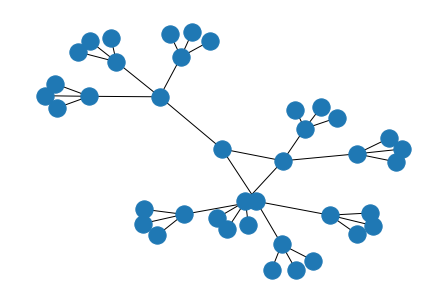

In [24]:
# Tree graph
T = nx.generators.balanced_tree(3, 3) #kid , height
plt.figure(12)
nx.draw(T)
plt.show()

**3.5 ring graph**

In [29]:
# ring graph
nx_ring = nx.cycle_graph(10)
cycle_graph = Network("300px","300px")
cycle_graph.from_nx(nx_ring)

#輸出並生成nx_ring.html
cycle_graph.show('./html/nx_ring.html')
#colab可以解開直接看
# IPython.display.HTML('./html/nx_ring.html')

## 4. 應用於Dataframe


**4.1 Dataset 1：edgelist**

In [30]:
df1_edge = pd.read_csv('./raw_data/Dataset1-Media-Example-EDGES.csv')
df1_node = pd.read_csv('./raw_data/Dataset1-Media-Example-NODES.csv')

In [32]:
df1_edge.head()

,from,to,weight,type
0,s01,s02,10,hyperlink
1,s01,s02,12,hyperlink
2,s01,s03,22,hyperlink
3,s01,s04,21,hyperlink
4,s04,s11,22,mention


In [33]:
df1_node.head()

,id,media,media.type,type.label,audience.size
0,s01,NY Times,1,Newspaper,20
1,s02,Washington Post,1,Newspaper,25
2,s03,Wall Street Journal,1,Newspaper,30
3,s04,USA Today,1,Newspaper,32
4,s05,LA Times,1,Newspaper,20


單純做網絡圖

In [34]:
def df1_network(data_node, data_edge):
    g = Network(directed=True)
    nodes = len(data_node['id']) #點
    g.add_nodes( data_node['id'])

    edges = []
    for i in range(0, len(data_edge)):
      edge = (data_edge['from'][i], data_edge['to'][i])
      edges.append(edge)
  
    g.add_edges(edges)
    return g

In [35]:
df1_net = df1_network(df1_node, df1_edge)
df1_net.show('./html/df1_net.html')
#colab可以解開直接看
# IPython.display.HTML('./html/df1_net.html')

添加其他dataframe裡面的資訊
+ data_node['audience.size']：設定為 node 的 value
+ data_node['type.label']：設定為 node 的 label
+ data_node['media.type']：設定為 node 的顏色

In [36]:
def df1_network(data_node, data_edge):
    g = Network(directed=True)
    nodes = len(data_node['id']) #點
    
    # Newspaper(type1)=green , TV(type2)=pink , Online(type3)=blue
    color = []
    media_type = list(df1_node['media.type'])
    for i in media_type:
      if i==1: color.append('#98A38D')
      elif i==2: color.append('#E1CCD1')
      else: color.append('#C0CADA')

    values = [int(x) for x in data_node['audience.size']]
    g.add_nodes( data_node['id'], value= values, label=data_node['type.label'], color=color)

    edges = []
    for i in range(0, len(data_edge)):
      edge = (data_edge['from'][i], data_edge['to'][i])
      edges.append(edge)
  
    g.add_edges(edges)
    return g

In [39]:
df1_net = df1_network(df1_node, df1_edge)
df1_net.show('./html/df1_net.html')
#colab可以解開直接看
# IPython.display.HTML('./html/df1_net.html')

**4.2 Dataset：matrix**

In [40]:
df2_edge = pd.read_csv('./raw_data/Dataset2-Media-User-Example-EDGES.csv')
df2_node = pd.read_csv('./raw_data/Dataset2-Media-User-Example-NODES.csv')

In [41]:
df2_edge

,Unnamed: 0,U01,U02,U03,U04,U05,U06,U07,U08,U09,...,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20
0,s01,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,s02,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,s03,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,s04,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,s05,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
5,s06,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
6,s07,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
7,s08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
8,s09,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,s10,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


轉換為adjacency matrix

In [46]:
S_matrix = df2_edge.iloc[:,1:]
S_matrix = S_matrix.dot(S_matrix.T)
np.fill_diagonal(S_matrix.values, 0)
S_matrix

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1
5,0,0,0,0,1,0,1,1,0,0
6,0,0,0,0,0,1,0,1,0,0
7,0,0,0,0,0,1,1,0,1,0
8,0,1,1,0,0,0,0,1,0,0
9,1,0,0,1,1,0,0,0,0,0


In [47]:
def adjacency_matrix(vertex, matrix, matrix2):
    g = Network()
    nodes = len(vertex) #點
    
    #label
    labels = []
    for i in vertex:
      labels.extend(df2_node[df2_node['id'] == i]['media'].tolist())

    g.add_nodes(vertex, label=labels)

    for i in range(0, nodes):
      for j in range(0, nodes):
        if(matrix.iloc[i,j] != 0):
          source = vertex[i]
          to = vertex[j]
          
          g.add_edge( source, to)
    return g

In [48]:
node_s = list(df2_edge.iloc[:,0])
node_s

['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10']

In [49]:
adjacency_s = adjacency_matrix(node_s, S_matrix, df2_node)
adjacency_s.show('./html/adjacency_s.html')
#colab可以解開直接看
# IPython.display.HTML('./html/adjacency_s.html')

轉換為adjacency matrix

In [50]:
U_matrix = df2_edge.iloc[:,1:]
U_matrix = U_matrix.T.dot(U_matrix)
np.fill_diagonal(U_matrix.values, 0)
U_matrix

,U01,U02,U03,U04,U05,U06,U07,U08,U09,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20
U01,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
U02,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
U03,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
U04,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
U05,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
U06,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1
U07,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
U08,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
U09,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0
U10,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [51]:
node_u = list(df2_edge.columns[1:])
print(node_u)

['U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08', 'U09', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U20']


In [52]:
adjacency_u = adjacency_matrix(node_u, U_matrix, df2_node)
adjacency_u.show('./html/adjacency_u.html')
#colab可以解開直接看
# IPython.display.HTML('./html/adjacency_u.html')